# About the notebook
[Back to the topic](pathway_toc.ipynb)

We are in step 05 now. 

<img src="./fig/03 pathway analysis steps.png">

----

# Set environment

In [17]:
source("Pathway_config.R")
source("Pathway_util.R")

# Import data

In [18]:
attach(file.path(OUTDIR, "dds_rld.RData"))
attach(file.path(OUTDIR, "genesets_cne_h99.RData"))
attach(file.path(OUTDIR, "res_gage.RData"))

The following objects are masked from file:/home/jovyan/work/scratch/analysis_output/out/dds_rld.RData (pos = 6):

    dds_add, dds_mult, rld_add, rld_mult

The following object is masked from file:/home/jovyan/work/scratch/analysis_output/out/genesets_cne_h99.RData (pos = 6):

    genesets_cne_h99

The following objects are masked from file:/home/jovyan/work/scratch/analysis_output/out/res_gage.RData (pos = 6):

    gageres01, gageres02



search by id

In [3]:
get_geneset_name("ec00010", genesets_cne_h99)

[1] "ec00010 | Glycolysis / Gluconeogenesis"

In [19]:
get_geneset_id(c("glycolysis"), genesets_cne_h99)

[1]   1 151 247 248 249 327 362 633 643

In [20]:
get_geneset_id(c("glycolysis", "Gluconeogenesis"), genesets_cne_h99)

[1] 1

In [5]:
get_geneset_lst("ec00010", genesets_cne_h99)

[1] "CNAG_00038" "CNAG_00057" "CNAG_00515" "CNAG_00735" "CNAG_00797"
 [6] "CNAG_01078" "CNAG_01120" "CNAG_01675" "CNAG_01820" "CNAG_01955"
[11] "CNAG_02035" "CNAG_02377" "CNAG_02489" "CNAG_02736" "CNAG_02903"
[16] "CNAG_03072" "CNAG_03358" "CNAG_03916" "CNAG_04217" "CNAG_04523"
[21] "CNAG_04659" "CNAG_04676" "CNAG_05059" "CNAG_05113" "CNAG_06035"
[26] "CNAG_06313" "CNAG_06628" "CNAG_06699" "CNAG_06770" "CNAG_07004"
[31] "CNAG_07316" "CNAG_07559" "CNAG_07660" "CNAG_07745"

In [7]:
pathid <- "ec00010"
cat(pathid)
cat("\n", "=============", "\n")
cat(get_geneset_name(pathid))
cat("\n", "=============", "\n")
cat(get_geneset_lst(pathid))

ec00010
ec00010 | Glycolysis / Gluconeogenesis
CNAG_00038 CNAG_00057 CNAG_00515 CNAG_00735 CNAG_00797 CNAG_01078 CNAG_01120 CNAG_01675 CNAG_01820 CNAG_01955 CNAG_02035 CNAG_02377 CNAG_02489 CNAG_02736 CNAG_02903 CNAG_03072 CNAG_03358 CNAG_03916 CNAG_04217 CNAG_04523 CNAG_04659 CNAG_04676 CNAG_05059 CNAG_05113 CNAG_06035 CNAG_06313 CNAG_06628 CNAG_06699 CNAG_06770 CNAG_07004 CNAG_07316 CNAG_07559 CNAG_07660 CNAG_07745

In [6]:
pathid <- "ec00010"
rld    <- rld_add

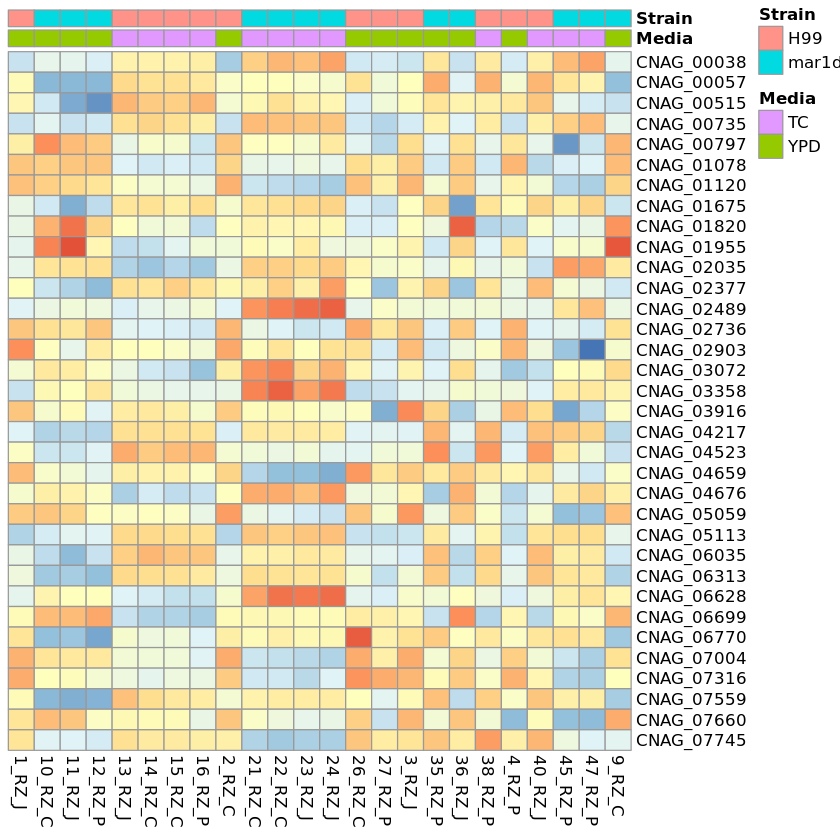

In [7]:
### Add main title, drop legend and disable clustering on columns and rows
annodf <- as.data.frame(colData(rld)[,c("Media", "Strain"), drop=FALSE])
pheatmap(assay(rld)[get_geneset_lst(pathid),],
         scale = "row",
         annotation_col = annodf,
         legend = FALSE,
         cluster_rows = FALSE,
         cluster_cols = FALSE)

# Visualization with KEGG pathway map

<img src="http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/images/KEGG%20Graph.png" alt="Arginine and proline metabolism from http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/help.jsp" width="500px">
[link to the source of image](http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/help.jsp)

## Problem

There are three cryptococcus strain in [KEGG](https://www.genome.jp/kegg/catalog/org_list.html)
- [Cryptococcus neoformans var. neoformans JEC21](https://www.genome.jp/kegg-bin/show_organism?org=cne) `-> cne`
- [Cryptococcus neoformans var. neoformans B-3501A](https://www.genome.jp/kegg-bin/show_organism?org=cnb) `-> cnb`
- [Cryptococcus gattii WM276](https://www.genome.jp/kegg-bin/show_organism?org=cgi) `-> cgi`

## Solution

<img src="./fig/04 Ortholog mapping.png">

----

## Choose a species for ortholog mapping from C. neoformans h99
Which species will you choose?
- Human
- mice
- Sacchromyces cerevisiae
- Cryptococcus neoformans JEC21

<img src="https://www.researchgate.net/profile/Phelim_Yong/publication/267707743/figure/fig1/AS:295581927919616@1447483631186/Phylogenetic-comparisons-of-C-neoformans-Aspergillus-spp-Candida-spp-and-S.png" alt="phylogenetic tree of Cryptococcus">
[link to the source of image](https://www.researchgate.net/figure/Phylogenetic-comparisons-of-C-neoformans-Aspergillus-spp-Candida-spp-and-S_fig1_267707743)

In [10]:
h99_jec21 <- read_tsv(
    file.path(INFODIR, 'h99_jec21_syntenic_orthologs.txt'), 
    col_names = c('h99', 'source', 'jec21', '_'))

h99_jec21 <- h99_jec21 %>% dplyr::select(h99, jec21) %>% distinct

set.seed(1)
h99_jec21 %>% sample_n(size = 5)

Parsed with column specification:
cols(
  h99 = col_character(),
  source = col_character(),
  jec21 = col_character(),
  `_` = col_character()
)


h99,jec21
CNAG_02013,CNK03480
CNAG_02858,CNC04750
CNAG_04358,CNI01920
CNAG_07342,CNA02180
CNAG_01540,CNC06430


# Quick Example

In [11]:
idx <- 1
genesets_cne_h99[idx]

$`ec00010 | Glycolysis / Gluconeogenesis`
 [1] "CNAG_00038" "CNAG_00057" "CNAG_00515" "CNAG_00735" "CNAG_00797"
 [6] "CNAG_01078" "CNAG_01120" "CNAG_01675" "CNAG_01820" "CNAG_01955"
[11] "CNAG_02035" "CNAG_02377" "CNAG_02489" "CNAG_02736" "CNAG_02903"
[16] "CNAG_03072" "CNAG_03358" "CNAG_03916" "CNAG_04217" "CNAG_04523"
[21] "CNAG_04659" "CNAG_04676" "CNAG_05059" "CNAG_05113" "CNAG_06035"
[26] "CNAG_06313" "CNAG_06628" "CNAG_06699" "CNAG_06770" "CNAG_07004"
[31] "CNAG_07316" "CNAG_07559" "CNAG_07660" "CNAG_07745"

suppose we have five genes from h99

In [12]:
genelst <- data.frame(
    h99   = c("CNAG_00038", "CNAG_00057", "CNAG_00515", "CNAG_00735", "CNAG_00797"),
    value = seq(-1, 1, length.out = 5)
)
print(genelst)

         h99 value
1 CNAG_00038  -1.0
2 CNAG_00057  -0.5
3 CNAG_00515   0.0
4 CNAG_00735   0.5
5 CNAG_00797   1.0


map to the ortholog of the jec21

In [13]:
dat <- h99_jec21 %>% 
    filter(h99 %in% genelst$h99) %>%
    left_join(., genelst, by = "h99") 
head(dat)

dat <- dat %>% group_by(jec21) %>% summarize(value = mean(value))
head(dat)

tmp <- dat$value
names(tmp) <- dat$jec21
print(tmp)

Warning message:
“Column `h99` joining character vector and factor, coercing into character vector”

h99,jec21,value
CNAG_00038,CNA00280,-1.0
CNAG_00057,CNA00470,-0.5
CNAG_00515,CNA04970,0.0
CNAG_00735,CNA07130,0.5
CNAG_00797,CNA07740,1.0


jec21,value
CNA00280,-1.0
CNA00470,-0.5
CNA04970,0.0
CNA07130,0.5
CNA07740,1.0


CNA00280 CNA00470 CNA04970 CNA07130 CNA07740 
    -1.0     -0.5      0.0      0.5      1.0 


In [14]:
pathview(
    gene.data = tmp,        # a vector of your gene or numeric vector of your gene expression
    out.suffix = "example01", # suffix of your image filename
    pathway.id = "00010",   # pathway id used in KEGG
    species = "cne",        # specie you are interested
    gene.idtype = "kegg",   # the type of your id
    kegg.native = T,      
    same.layer=T)

Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

Another example

In [15]:
genelst <- data.frame(
    h99   = c("CNAG_00057", "CNAG_03916", "CNAG_06313", "CNAG_06699", "CNAG_06770"),
    value = seq(-1, 1, length.out = 5)
)
print(genelst)

dat <- h99_jec21 %>% 
    filter(h99 %in% genelst$h99) %>%
    left_join(., genelst, by = "h99") 
head(dat)

dat <- dat %>% group_by(jec21) %>% summarize(value = mean(value))
head(dat)

tmp <- dat$value
names(tmp) <- dat$jec21
print(tmp)

         h99 value
1 CNAG_00057  -1.0
2 CNAG_03916  -0.5
3 CNAG_06313   0.0
4 CNAG_06699   0.5
5 CNAG_06770   1.0


Warning message:
“Column `h99` joining character vector and factor, coercing into character vector”

h99,jec21,value
CNAG_00057,CNA00470,-1.0
CNAG_03916,CNB04050,-0.5
CNAG_06313,CNN00430,0.0
CNAG_06699,CNF03160,0.5
CNAG_06770,CNB00300,1.0


jec21,value
CNA00470,-1.0
CNB00300,1.0
CNB04050,-0.5
CNF03160,0.5
CNN00430,0.0


CNA00470 CNB00300 CNB04050 CNF03160 CNN00430 
    -1.0      1.0     -0.5      0.5      0.0 


In [16]:
pathview(
    gene.data = tmp,        # a vector of your gene or numeric vector of your gene expression
    out.suffix = "example02", # suffix of your image filename
    pathway.id = "00010",   # pathway id used in KEGG
    species = "cne",        # specie you are interested
    gene.idtype = "kegg",   # the type of your id
    kegg.native = T,      
    same.layer=T)

Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

![](cne00010.png)

In [12]:
? image

In [1]:
print(1)

[1] 1


In [2]:
library(png)

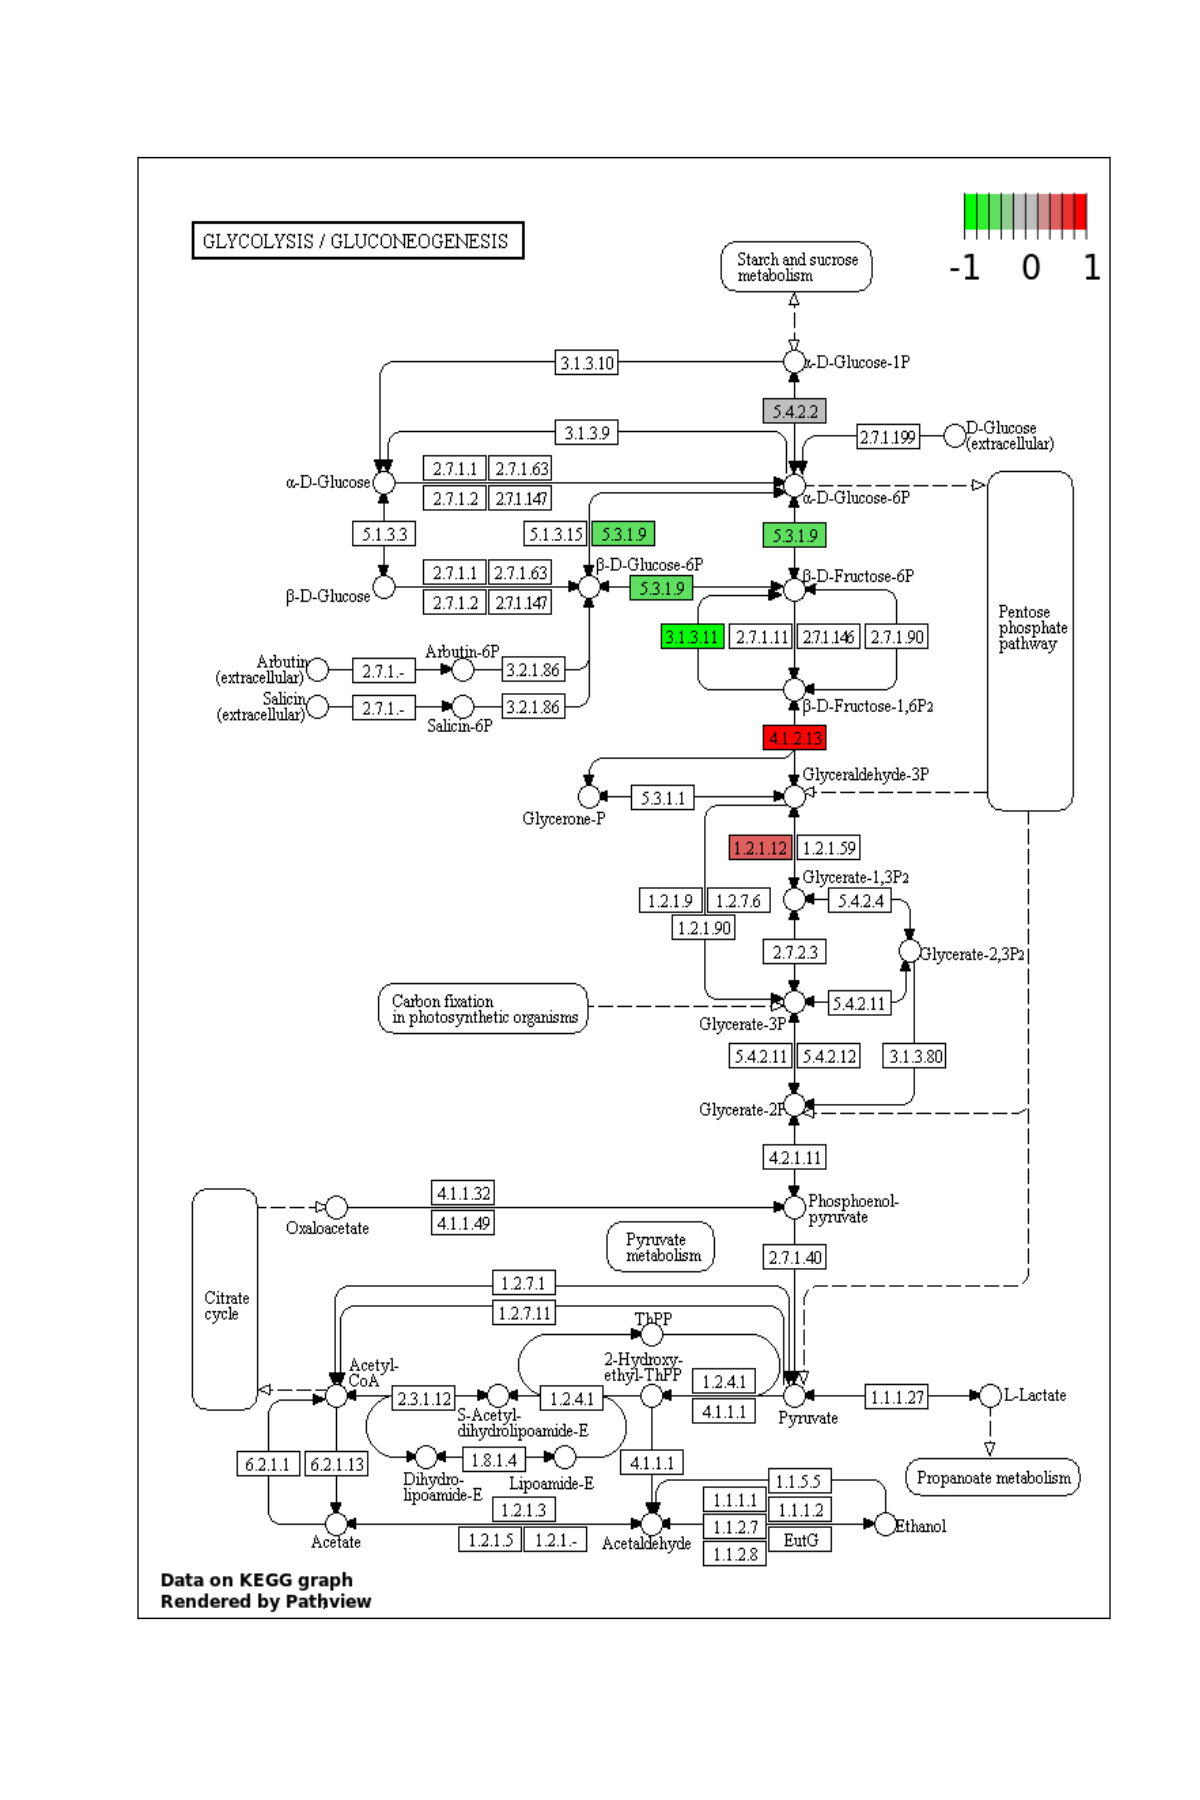

In [17]:
options(repr.plot.width=10, repr.plot.height=15)
img <- readPNG("cne00010.example.png")
plot.new() 
rasterImage(img,0,0,1,1)
#rasterImage(img, -0.5, -0.3, 1.5, 1.3)

![](cne00010.example.png)